In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import tensorflow as tf
import pickle

In [2]:
def gload(gsname):
    with tf.io.gfile.GFile(gsname, "rb") as file:
        obj = pickle.load(file)
    return obj

def load_precomp(basedir):
    Ms = gload(f'{basedir}/Mlist')
    ks = gload(f'{basedir}/ks')
    return Ms, ks

def load(name):
    return load_precomp(f'gs://hml-public/dd/{name}')

Ms, ks = load('cifar10-resnet18k-50k-adam')

In [3]:
kmax=np.max(ks)
test_err = Ms[0]['Test Error'][:kmax, -1]
train_err = Ms[0]['Train Error'][:kmax, -1]
test_loss = Ms[0]['Test Loss'][:kmax, -1]
train_loss = Ms[0]['Train Loss'][:kmax, -1]
gen = -np.log(1-test_err)-train_loss

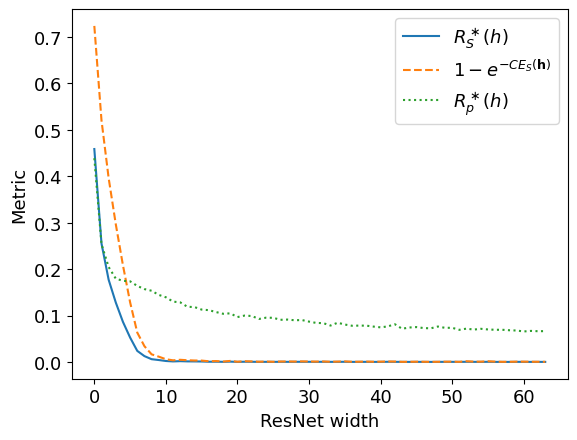

In [6]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots()
ax.plot( train_err, label=r'$R_S^\ast(h)$')
ax.plot( 1-np.exp(-train_loss), label=r'$1-e^{-CE_S(\mathbf{h})}$',linestyle='dashed')
ax.plot( test_err, label=r'$R_p^\ast(h)$',linestyle='dotted')
ax.set_xlabel("ResNet width")
ax.set_ylabel("Metric")
ax.legend(loc='upper right')
ax.legend(loc='upper right')